In [1]:
from pathlib import Path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##
data_repo = Path.home()/'group'/'project'/'datasets'/'data'/'230412_jugaad_analysis'
penn_state_result = data_repo/'230104_synca1_5slot_scan_beamforming_results.npz'
##
jugaad_beamforming = data_repo/'230105_beamforming_max_power.npy'
jugaad_power = data_repo/'230105_jugaad_total_power.npy'
##
#cresana_path = Path.home()/'iCloud'/'jugaad_data'/'beamforming'
#cresana_beamforming = 'cresana_beamforming_amplitude.npy'
#cresana_power = 'cresana_perfect_phase_amplitude.npy'



In [2]:
penn_state_data = np.load(penn_state_result)
penn_state_beam_max = penn_state_data['max_val']

# exclude negative axial positions
penn_state_beam_max = penn_state_beam_max[3:, :]
# exclude negative radial positions
penn_state_beam_max = penn_state_beam_max[:, 2:]
penn_state_beam_max = np.sqrt(np.flip(penn_state_beam_max.T, axis=0))

####

penn_state_tot_power = penn_state_data['max_val_ideal_phase']

# exclude negative axial positions
penn_state_tot_power = penn_state_tot_power[3:, :]
# exclude negative radial positions
penn_state_tot_power = penn_state_tot_power[:, 2:]
penn_state_tot_power = np.sqrt(np.flip(penn_state_tot_power.T, axis=0))


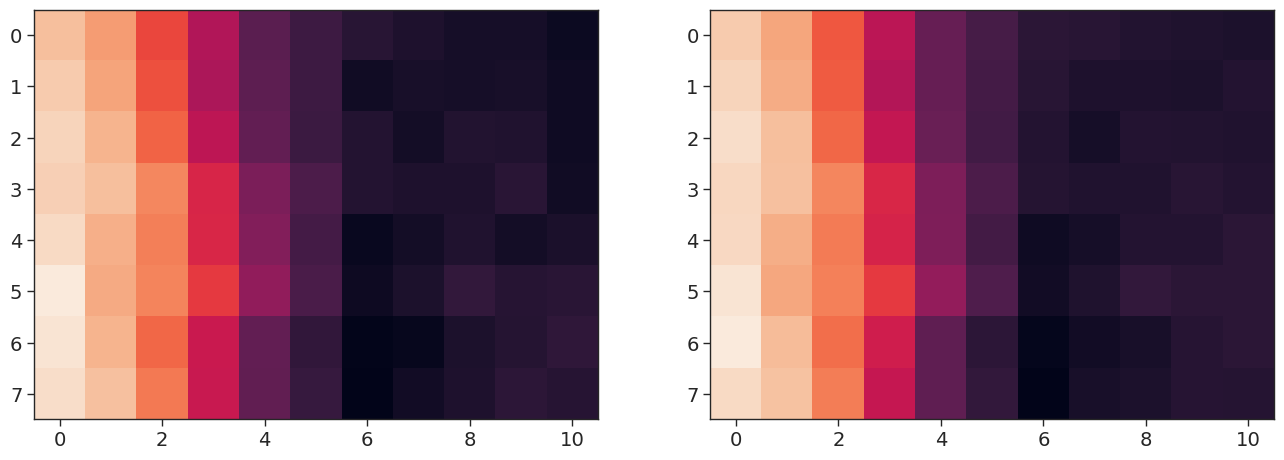

In [14]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,2,1)

ax.imshow(penn_state_beam_max)

ax = fig.add_subplot(1,2,2)

ax.imshow(penn_state_tot_power)

In [3]:
jugaad_beam_max = np.load(jugaad_beamforming)
#jugaad_beam_max = np.mean(jugaad_beam_max, axis=-1)
jugaad_beam_max = jugaad_beam_max[:,:,77]
jugaad_beam_max = np.flip(jugaad_beam_max, axis=0)

In [4]:
jugaad_tot_power = np.load(jugaad_power)
#jugaad_tot_power = np.mean(jugaad_tot_power, axis=-1)
jugaad_tot_power = jugaad_tot_power[:,:,77]
jugaad_tot_power = np.flip(jugaad_tot_power, axis=0)

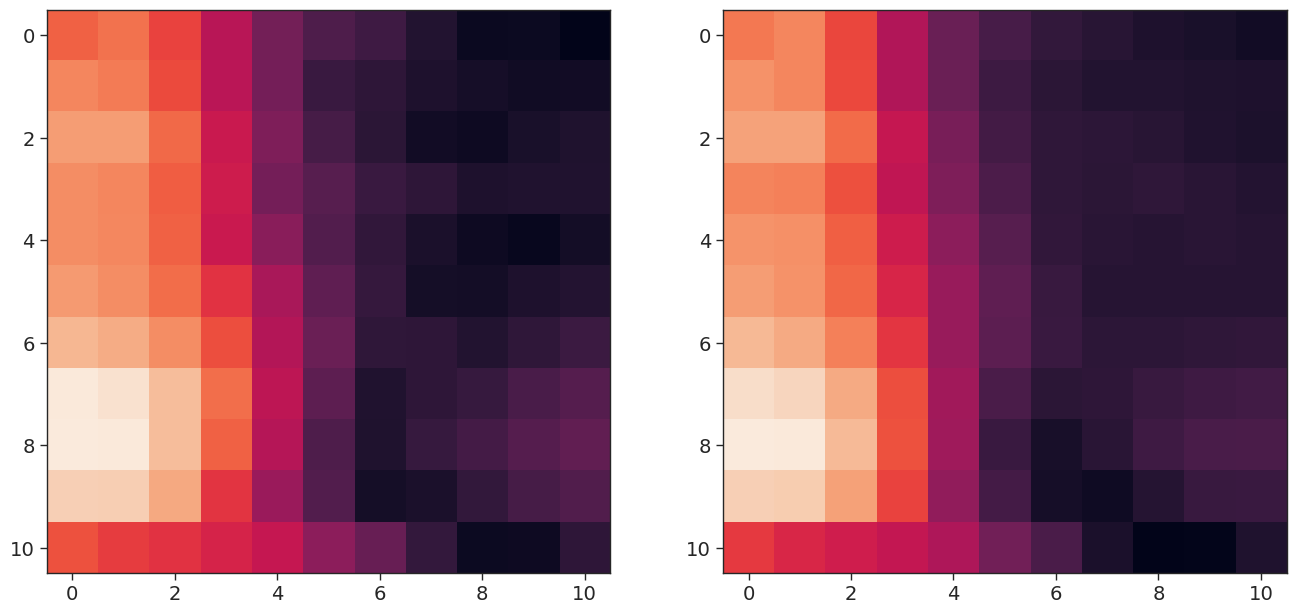

In [15]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,2,1)

ax.imshow(jugaad_beam_max)

ax = fig.add_subplot(1,2,2)

ax.imshow(jugaad_tot_power)

In [6]:
sns.set_theme(style='ticks', context='paper', font_scale=1.5)
cmap = sns.color_palette('plasma', as_cmap=True)

In [7]:
data_list = [penn_state_beam_max, jugaad_beam_max, cresana_beam_max]
extent_list = [(0, 50, 0, 35), (0, 50, 0, 50), (0, 30, 0, 45)]
axs = []
fig = plt.figure(figsize = (26, 8))
for i, data_item in enumerate(data_list):
    axs.append(fig.add_subplot(1,len(data_list),i+1))
    
    img = axs[i].imshow(
        data_item,
        aspect='auto',
        extent = extent_list[i], 
        cmap='viridis'
    )


NameError: name 'cresana_beam_max' is not defined

In [8]:
data_list = [penn_state_tot_power, jugaad_tot_power, cresana_tot_power]
extent_list = [(0, 50, 0, 35), (0, 50, 0, 50), (0, 30, 0, 45)]
axs = []
fig = plt.figure(figsize = (26, 8))
for i, data_item in enumerate(data_list):
    axs.append(fig.add_subplot(1,len(data_list),i+1))
    
    img = axs[i].imshow(
        data_item,
        aspect='auto',
        cmap='viridis'
    )


NameError: name 'cresana_tot_power' is not defined

In [9]:
sns.set_theme(style='whitegrid', context='talk', font_scale=1.2)

# examine beamformed power next to ideally summed power 

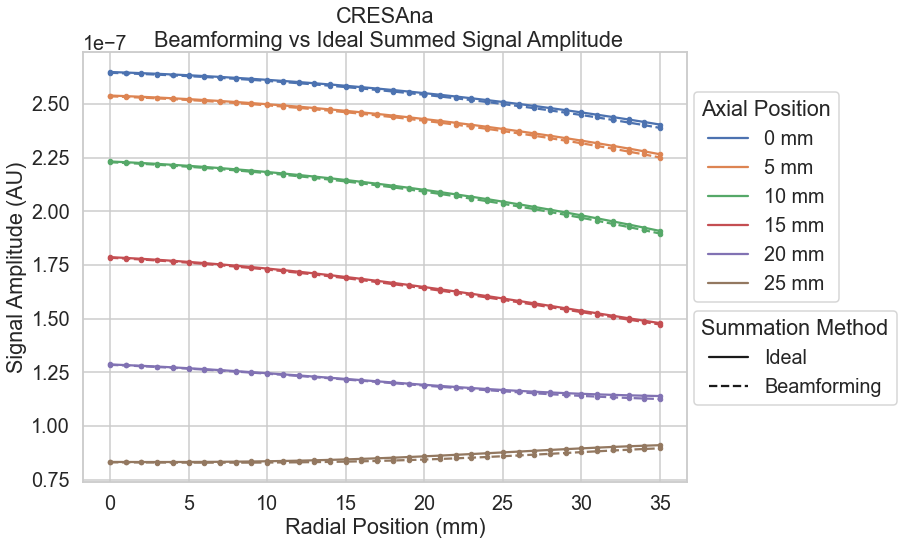

In [181]:
beam_data_list = [penn_state_beam_max, jugaad_beam_max, cresana_beam_max]
tot_data_list = [penn_state_tot_power, jugaad_tot_power, cresana_tot_power]
extent_list = [(0, 50, 0, 35), (0, 50, 0, 50), (0, 30, 0, 45)]
clist = sns.color_palette('deep', n_colors=11)
axs = []
fig = plt.figure(figsize = (13, 8))
ax = fig.add_subplot(1,1,1)

axial_positions = np.arange(0,30,5)
axial_lines = []

for i, data_item in enumerate(data_list):
    '''
    if i == 1: # synthetic array data
        for j in range(6):
            ax.plot(
                np.arange(0, 40, 5),
                np.flip(beam_data_list[i][0:8, j]),
                ls='--',
                marker='.',
                color=clist[j]
            )
            ax.plot(
                np.arange(0, 40, 5),
                np.flip(max_data_list[i][0:8, j]),
                ls='-',
                marker='.',
                color=clist[j]
            )
    '''
    if i == 2:
        for j in range(6):
            ax.plot(
                np.arange(0, 36, 1),
                np.flip(beam_data_list[i][0:36, j*5]),
                ls='--',
                marker='.',
                color=clist[j]
            )
            ax.plot(
                np.arange(0, 36, 1),
                np.flip(max_data_list[i][0:36, j*5]),
                ls='-',
                marker='.',
                color=clist[j]
            )
    if i == 2:    
        for j in range(6): # legend
            line, = ax.plot(
                [],
                [],
                ls='-',
                label=f'{axial_positions[j]} mm'
            )
            axial_lines.append(line)
        ideal_line, = ax.plot(
            [],
            [],
            ls='-',
            color='k',
            label='Ideal Summation',
        )
        beam_line, = ax.plot(
            [],
            [],
            ls='--',
            color='k',
            label='Beamforming'
        )
legend1 = plt.legend(
    handles=axial_lines,
    labels = [f'{n} mm' for n in axial_positions],
    loc=(1.01,0.42),
    title='Axial Position',
)
legend2 = plt.legend(
    handles=[ideal_line, beam_line],
    labels = ['Ideal', 'Beamforming'],
    loc=(1.01,0.18),
    title='Summation Method',
)
plt.gca().add_artist(legend1)
ax.set_xlabel('Radial Position (mm)')
ax.set_ylabel('Signal Amplitude (AU)')
ax.set_title('CRESAna'+'\n'+' Beamforming vs Ideal Summed Signal Amplitude')
plt.tight_layout(pad=1.05)
#plt.savefig(Path.home()/'iCloud'/'plots'/'230202_cresana_beamformed_vs_ideal_comparison_plot', dpi=144)
            


# Normalize the units, to compare between data sets

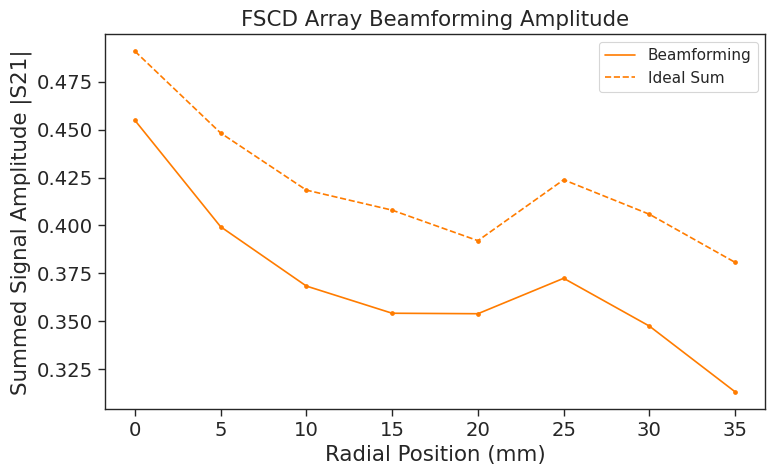

In [35]:
beam_data_list = [penn_state_beam_max, jugaad_beam_max,]#[penn_state_beam_max, jugaad_beam_max, cresana_beam_max]
tot_data_list = [penn_state_tot_power, jugaad_tot_power,]#[penn_state_tot_power, jugaad_tot_power, cresana_tot_power]
extent_list = [(0, 50, 0, 35), (0, 50, 0, 50), (0, 30, 0, 45)]
clist = sns.color_palette('bright', n_colors=11)
sns.set_theme(context='paper', style='ticks', font_scale=1.6)
axs = []
fig = plt.figure(figsize = (8, 5))
ax = fig.add_subplot(1,1,1)
#ax2 = ax.twinx()

axial_positions = np.arange(0,5,5)
axial_lines = []
n_axial = 6


for j in range(axial_positions.size):
    if j == 0:
        tot_norm_syn = np.flip(tot_data_list[0][:, j])[3]
        tot_norm_jug = np.flip(tot_data_list[1][0:8, j])[3]
        
        beam_norm_syn = np.flip(beam_data_list[0][:, j])[3]
        beam_norm_jug = np.flip(beam_data_list[1][0:8, j])[3]
        
    beam_syn = np.flip(beam_data_list[0][:, j])
    tot_syn = np.flip(tot_data_list[0][:, j])
    
    beam_jug = np.flip(beam_data_list[1][0:8, j])
    tot_jug = np.flip(tot_data_list[1][0:8, j])
    
    ax.plot(
        np.arange(0, 40, 5),
        #beam_data/norm,
        #beam_syn/beam_norm_syn,
        #beam_syn,
        beam_jug,
        ls='-',
        marker='.',
        color=clist[1],
    )
    ax.plot(
        np.arange(0, 40, 5),
        #beam_data/norm,
        #beam_jug/beam_norm_jug,
        #tot_syn,
        tot_jug,
        ls='--',
        marker='.',
        color=clist[1]
    )
    

line_artists = []
for j in range(axial_positions.size):
    temp_line,  = ax.plot([],[],color=clist[j], ls='-', marker='None')
    line_artists.append(temp_line)
    
ls_artists = []
temp_line, = ax.plot([],[],color=clist[1],ls='-')
ls_artists.append(temp_line)
temp_line, = ax.plot([],[],color=clist[1],ls='--')
ls_artists.append(temp_line)

    
#leg1 = ax.legend(
#    line_artists,
#    [f'{r}' for r in axial_positions],
#    ncol=axial_positions.size,
#    loc=0,
#    fontsize=11,
#    columnspacing=1,
#    title='Axial Position (mm)',
#    title_fontsize=11
#)
leg2 = ax.legend(
    ls_artists,
    ['Beamforming', 'Ideal Sum'],
    ncol=axial_positions.size,
    loc=1,
    fontsize=11,
    columnspacing=0.5
)


#plt.gca().add_artist(leg1)    

ax.set_xlabel('Radial Position (mm)')
ax.set_ylabel('Summed Signal Amplitude |S21|')
ylims = ax.get_ylim()
#ax.set_ylim(ylims[0], 1.3)
ax.set_title('FSCD Array Beamforming Amplitude')
plt.tight_layout(pad=1.05)
#plt.savefig(Path.home()/'group'/'project'/'plots'/'230509_fscd_array_beamform_amplitude', dpi=150)
#plt.savefig(Path.home()/'group'/'project'/'plots'/'230415_normalized_total_amplitude_comparison', dpi=150)

# examine ratios of beamformed power to total power for sythetic array and jugaad

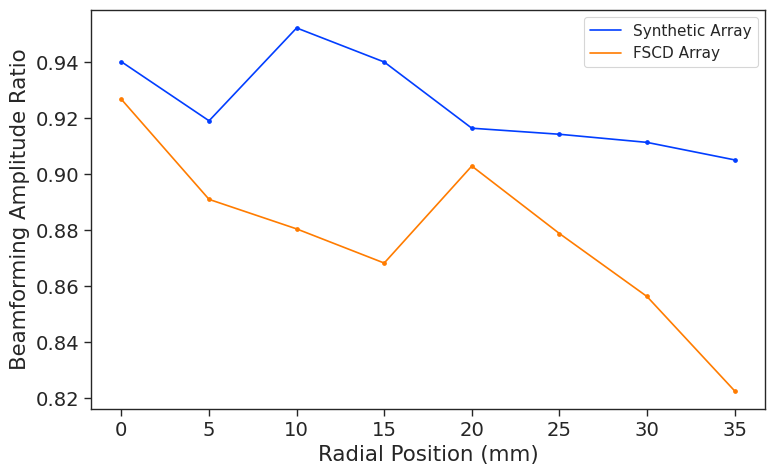

In [43]:
beam_data_list = [penn_state_beam_max, jugaad_beam_max,]#[penn_state_beam_max, jugaad_beam_max, cresana_beam_max]
tot_data_list = [penn_state_tot_power, jugaad_tot_power,]#[penn_state_tot_power, jugaad_tot_power, cresana_tot_power]
extent_list = [(0, 50, 0, 35), (0, 50, 0, 50), (0, 30, 0, 45)]
clist = sns.color_palette('bright', n_colors=11)
sns.set_theme(context='paper', style='ticks', font_scale=1.6)
axs = []
fig = plt.figure(figsize = (8, 5))
ax = fig.add_subplot(1,1,1)
#ax2 = ax.twinx()

axial_positions = np.arange(0,5,5)
axial_lines = []
n_axial = 6


for j in range(axial_positions.size):
    if j == 0:
        tot_norm_syn = np.flip(tot_data_list[0][:, j])[3]
        tot_norm_jug = np.flip(tot_data_list[1][0:8, j])[3]
        
        beam_norm_syn = np.flip(beam_data_list[0][:, j])[3]
        beam_norm_jug = np.flip(beam_data_list[1][0:8, j])[3]
        
    beam_syn = np.flip(beam_data_list[0][:, j])
    tot_syn = np.flip(tot_data_list[0][:, j])
    
    beam_jug = np.flip(beam_data_list[1][0:8, j])
    tot_jug = np.flip(tot_data_list[1][0:8, j])
    
    ax.plot(
        np.arange(0, 40, 5),
        #beam_data/norm,
        #beam_syn/beam_norm_syn,
        beam_syn/tot_syn,
        ls='-',
        marker='.',
        color=clist[0],
    )
    ax.plot(
        np.arange(0, 40, 5),
        #beam_data/norm,
        #beam_jug/beam_norm_jug,
        beam_jug/tot_jug,
        ls='-',
        marker='.',
        color=clist[1]
    )
    

line_artists = []
for j in range(axial_positions.size):
    temp_line,  = ax.plot([],[],color=clist[j], ls='-', marker='None')
    line_artists.append(temp_line)
    
ls_artists = []
temp_line, = ax.plot([],[],color=clist[0],ls='-')
ls_artists.append(temp_line)
temp_line, = ax.plot([],[],color=clist[1],ls='-')
ls_artists.append(temp_line)

    
#leg1 = ax.legend(
#    line_artists,
#    [f'{r}' for r in axial_positions],
#    ncol=axial_positions.size,
#    loc=2,
#    fontsize=11,
#    columnspacing=1,
#    title='Axial Position (mm)',
#    title_fontsize=11
#)
leg2 = ax.legend(
    ls_artists,
    ['Synthetic Array', 'FSCD Array'],
    ncol=axial_positions.size,
    loc=1,
    fontsize=11,
    columnspacing=0.5
)


#plt.gca().add_artist(leg1)    

ax.set_xlabel('Radial Position (mm)')
ax.set_ylabel('Beamforming Amplitude Ratio')
ylims = ax.get_ylim()
#ax.set_ylim(ylims[0],0.3)
#ax.set_title('Normalized Beamformed Signal Amplitude Comparison')
plt.tight_layout(pad=1.05)
plt.savefig(Path.home()/'group'/'project'/'plots'/'230509_beamformed_idealsum_ratio_compare', dpi=150)
#plt.savefig(Path.home()/'group'/'project'/'plots'/'230415_beamforming_power_loss_compare', dpi=150)

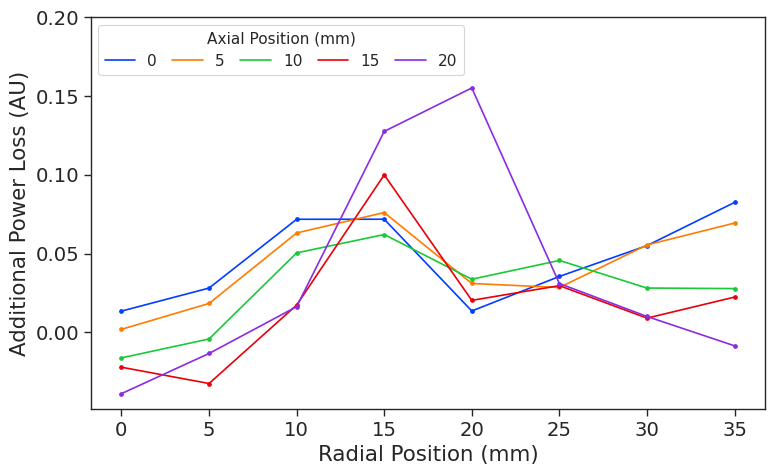

In [13]:
beam_data_list = [penn_state_beam_max, jugaad_beam_max,]#[penn_state_beam_max, jugaad_beam_max, cresana_beam_max]
tot_data_list = [penn_state_tot_power, jugaad_tot_power,]#[penn_state_tot_power, jugaad_tot_power, cresana_tot_power]
extent_list = [(0, 50, 0, 35), (0, 50, 0, 50), (0, 30, 0, 45)]
clist = sns.color_palette('bright', n_colors=11)
sns.set_theme(context='paper', style='ticks', font_scale=1.6)
axs = []
fig = plt.figure(figsize = (8, 5))
ax = fig.add_subplot(1,1,1)
#ax2 = ax.twinx()

axial_positions = np.arange(0,25,5)
axial_lines = []
n_axial = 6


for j in range(axial_positions.size):
    if j == 0:
        tot_norm_syn = np.flip(tot_data_list[0][:, j])[3]
        tot_norm_jug = np.flip(tot_data_list[1][0:8, j])[3]
        
        beam_norm_syn = np.flip(beam_data_list[0][:, j])[3]
        beam_norm_jug = np.flip(beam_data_list[1][0:8, j])[3]
        
    beam_syn = np.flip(beam_data_list[0][:, j])
    tot_syn = np.flip(tot_data_list[0][:, j])
    
    beam_jug = np.flip(beam_data_list[1][0:8, j])
    tot_jug = np.flip(tot_data_list[1][0:8, j])
    
    #ax.plot(
    #    np.arange(0, 40, 5),
        #beam_data/norm,
        #beam_syn/beam_norm_syn,
    #    1-beam_syn/tot_syn,
    #    ls='-',
    #    marker='.',
    #    color=clist[j],
    #)
    ax.plot(
        np.arange(0, 40, 5),
        #beam_data/norm,
        #beam_jug/beam_norm_jug,
        (1-beam_jug/tot_jug) - (1-beam_syn/tot_syn),
        ls='-',
        marker='.',
        color=clist[j]
    )
    

line_artists = []
for j in range(axial_positions.size):
    temp_line,  = ax.plot([],[],color=clist[j], ls='-', marker='None')
    line_artists.append(temp_line)
    
ls_artists = []
temp_line, = ax.plot([],[],color='k',ls='-')
ls_artists.append(temp_line)
temp_line, = ax.plot([],[],color='k',ls='--')
ls_artists.append(temp_line)

    
leg1 = ax.legend(
    line_artists,
    [f'{r}' for r in axial_positions],
    ncol=axial_positions.size,
    loc=2,
    fontsize=11,
    columnspacing=1,
    title='Axial Position (mm)',
    title_fontsize=11
)
#leg2 = ax.legend(
#    ls_artists,
#    ['Synthetic Array', 'JUGAAD'],
#    ncol=axial_positions.size,
#    loc=(0.01,0.77),
#    fontsize=11,
#    columnspacing=0.5
#)


#plt.gca().add_artist(leg1)    

ax.set_xlabel('Radial Position (mm)')
ax.set_ylabel('Additional Power Loss (AU)')
ylims = ax.get_ylim()
ax.set_ylim(ylims[0],0.2)
#ax.set_title('Normalized Beamformed Signal Amplitude Comparison')
plt.tight_layout(pad=1.05)
#plt.savefig(Path.home()/'group'/'project'/'plots'/'230415_beamformed_normalized_amplitude_comparison', dpi=150)
#plt.savefig(Path.home()/'group'/'project'/'plots'/'230415_beamforming_power_loss_difference', dpi=150)

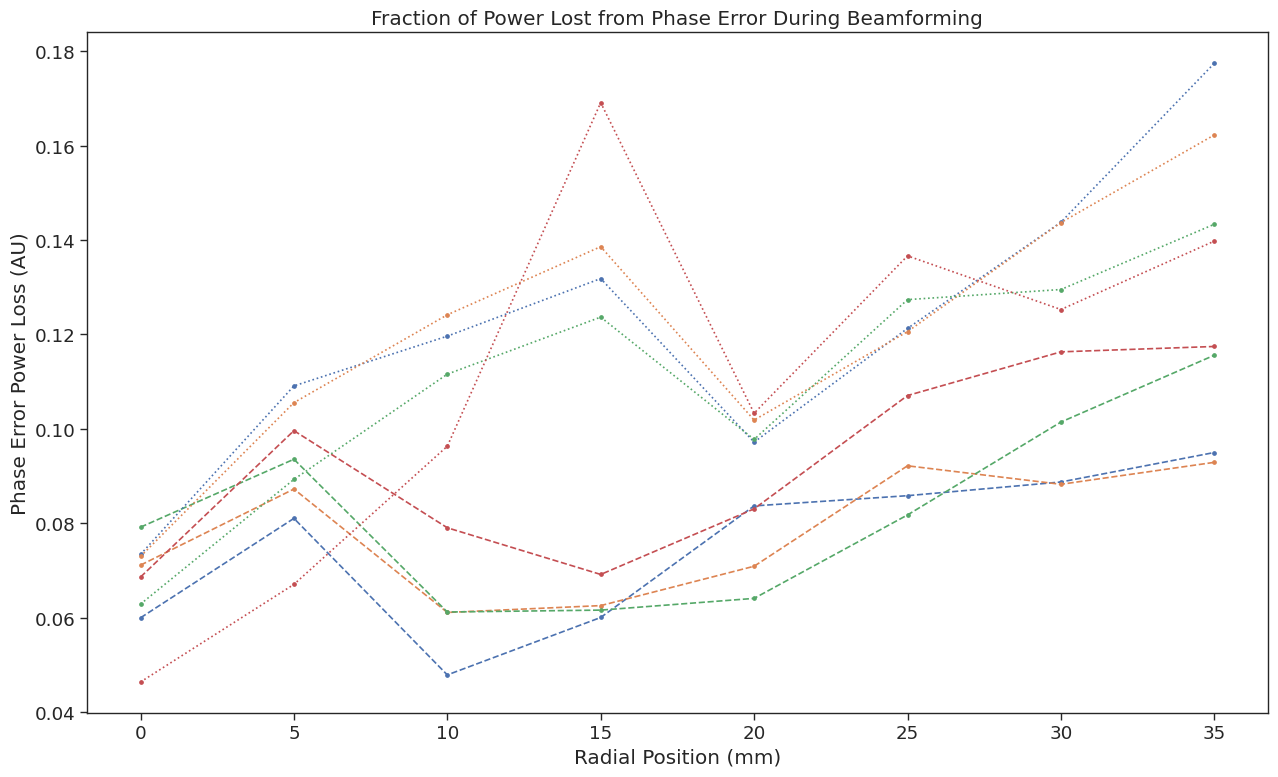

In [12]:
beam_data_list = [penn_state_beam_max, jugaad_beam_max,]
tot_data_list = [penn_state_tot_power, jugaad_tot_power,]
extent_list = [(0, 50, 0, 35), (0, 50, 0, 50), (0, 30, 0, 45)]
clist = sns.color_palette('deep', n_colors=11)
axs = []
fig = plt.figure(figsize = (13, 8))
ax = fig.add_subplot(1,1,1)

axial_positions = np.arange(0,30,5)
axial_lines = []

for i, data_item in enumerate(beam_data_list):
    if i == 0: # synthetic array data
        for j in range(4):
            
            max_line = np.flip(tot_data_list[i][:, j])
            beam_line = np.flip(beam_data_list[i][:, j])

            ax.plot(
                np.arange(0, 40, 5),
                1-(beam_line/max_line),
                ls='--',
                marker='.',
                color=clist[j]
            )
    if i == 1: # jugaad_data
        for j in range(4):
            
            max_line = np.flip(tot_data_list[i][0:8, j])
            beam_line = np.flip(beam_data_list[i][0:8, j])

            ax.plot(
                np.arange(0, 40, 5),
                1-(beam_line/max_line),
                ls=':',
                marker='.',
                color=clist[j],
               
            )
            
    #if i == 2: # cresana data
    #    for j in range(6):
            
    #        max_line = np.flip(max_data_list[i][0:36, j*5])
    #        beam_line = np.flip(beam_data_list[i][0:36, j*5])

    #        ax.plot(
    #            np.arange(0, 36, 1),
    #            1-(beam_line/max_line),
    #            ls='-',
    #            marker='None',
    #            color=clist[j],
                
    #        )
    #    # legend
    #    for j in range(6):
    #        
    #        line, = ax.plot([],[],color=clist[j],ls='-',label=f'{axial_positions[j]} mm')
    #        axial_lines.append(line)
            
    #    legend1 = plt.legend(
    #        handles=axial_lines,
    #        labels=[f'{n} mm' for n in axial_positions],
    #        loc=(1.01, 0.42),
    #        title = 'Axial Position'
    #    )
        
            
    #    line1, = ax.plot([],[],color='k',ls='-', label=f'CRESAna')
    #    line2, = ax.plot([],[],color='k',ls='--',label=f'Synthetic Array')
    #    line3, = ax.plot([],[],color='k',ls=':',label=f'JUGAAD')
            
    #    legend2= plt.legend(
    #        handles=[line1,line2,line3],
    #        labels=['CRESAna','Synthetic Array', 'JUGAAD'],
    #        loc=(1.01, 0.13),
    #        title='Dataset',
    #    )
    #    plt.gca().add_artist(legend1)
        
        
        
ax.set_xlabel('Radial Position (mm)')
ax.set_ylabel('Phase Error Power Loss (AU)')
ax.set_title('Fraction of Power Lost from Phase Error During Beamforming')
plt.tight_layout(pad=1.05)
#plt.savefig(Path.home()/'iCloud'/'plots'/'230202_jugaad_synthetic_cresana_beamforming_power_loss_fraction', dpi=144)

            
    

# examine difference between the ratio of beamformed power to total power between the jugaad and the synthetic array

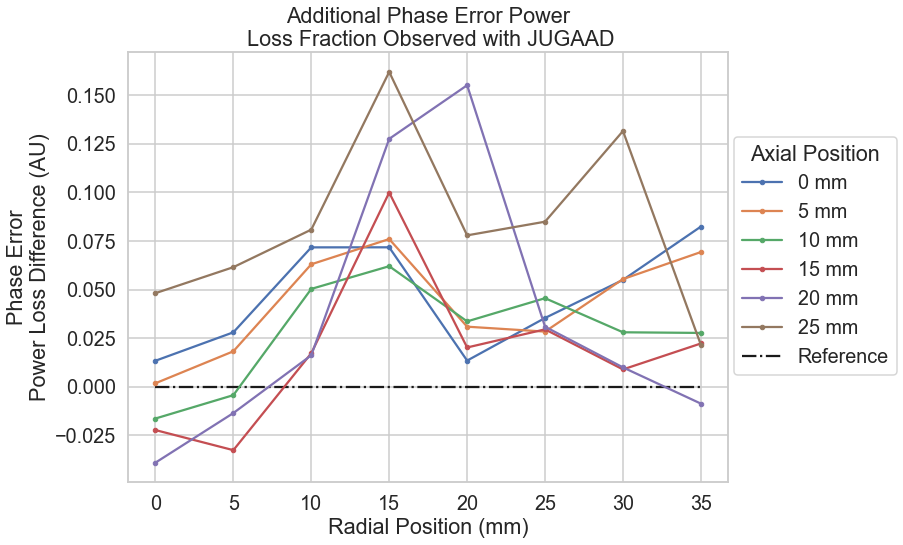

In [135]:
beam_data_list = [penn_state_beam_max, jugaad_beam_max, cresana_beam_max]
tot_data_list = [penn_state_tot_power, jugaad_tot_power, cresana_tot_power]
extent_list = [(0, 50, 0, 35), (0, 50, 0, 50), (0, 30, 0, 45)]
clist = sns.color_palette('deep', n_colors=11)
axs = []
fig = plt.figure(figsize = (13, 8))
ax = fig.add_subplot(1,1,1)

axial_positions = np.arange(0,35,5)
for j in range(6):
            
    max_line_synth = np.flip(max_data_list[0][:, j])
    beam_line_synth = np.flip(beam_data_list[0][:, j])
    
    max_line_jugaad = np.flip(max_data_list[1][0:8, j])
    beam_line_jugaad = np.flip(beam_data_list[1][0:8, j])
    
    synth_phase_error_loss = 1-beam_line_synth/max_line_synth
    jugaad_phase_error_loss = 1-beam_line_jugaad/max_line_jugaad

    ax.plot(
        np.arange(0, 40, 5),
        -1*(synth_phase_error_loss-jugaad_phase_error_loss),
        ls='-',
        marker='.',
        color=clist[j],
        label = f'{axial_positions[j]} mm'
    )
    
ax.hlines(0,xmin=0,xmax=35,color='k',ls='-.',label='Reference')
legend = ax.legend(loc=(1.01,0.25), title='Axial Position')
for item in legend.get_texts():
    item.set_ha('left')
ax.set_xlabel('Radial Position (mm)')
ax.set_ylabel('Phase Error'+'\n'+'Power Loss Difference (AU)')
ax.set_title('Additional Phase Error Power'+'\n'+' Loss Fraction Observed with JUGAAD')
plt.tight_layout(pad=1.05)

plt.savefig(Path.home()/'iCloud'/'plots'/'230202_additional_phase_error_loss_jugaad', dpi=144)
    
    

(-1.0, 36.0)

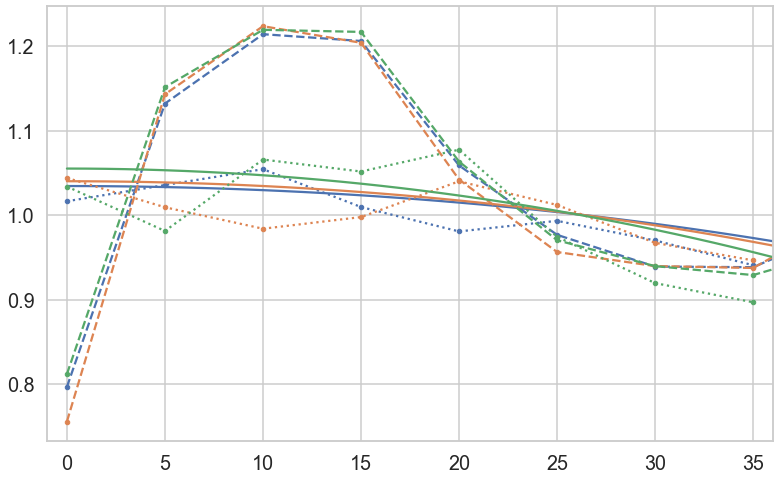

In [22]:
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

clist = sns.color_palette('deep', n_colors=10)
data_list = [penn_state_beam_max, jugaad_beam_max, cresana_beam_max]
x_list = [np.linspace(0, 35, 8), np.linspace(0, 50, 11), np.linspace(0, 45, 46)]


for i in range(3):
    for j, data_item in enumerate(data_list):
        if j == 0:
            ax.plot(x_list[j], np.flip(data_item[:, i] / np.mean(data_item[0:8, i])), marker='.', ls=':', color=clist[i])
        elif j == 1:
            ax.plot(x_list[j], np.flip(data_item[:, i] / np.mean(data_item[:, i])), marker='.', ls='--', color=clist[i])
        else:
            ax.plot(x_list[j], np.flip(data_item[:, i*5] / np.mean(data_item[:, i*5])), marker='None', ls='-', color=clist[i])
        
ax.set_xlim(-1,36)

In [ ]:
# data_list = [penn_state_tot_power, jugaad_tot_power, cresana_tot_power]
extent_list = [(0, 50, 0, 35), (0, 50, 0, 50), (0, 30, 0, 45)]
axs = []
fig = plt.figure(figsize = (26, 8))
for i, data_item in enumerate(data_list):
    axs.append(fig.add_subplot(1,len(data_list),i+1))
    if i < 2:
        for j in range(data_item.shape[1]):
            axs[i].plot(np.linspace(0, (data_item[:, j].size-1)*5, data_item[:,j].size), np.flip(data_item[:, j]))
    else:
        for j in [0, 5, 10, 15, 20, 25, 30]:
            axs[i].plot(np.linspace(0, data_item[:, j].size-1,data_item[:,j].size), np.flip(data_item[:, j]))
            
    axs[i].set_xlim(0, 50)


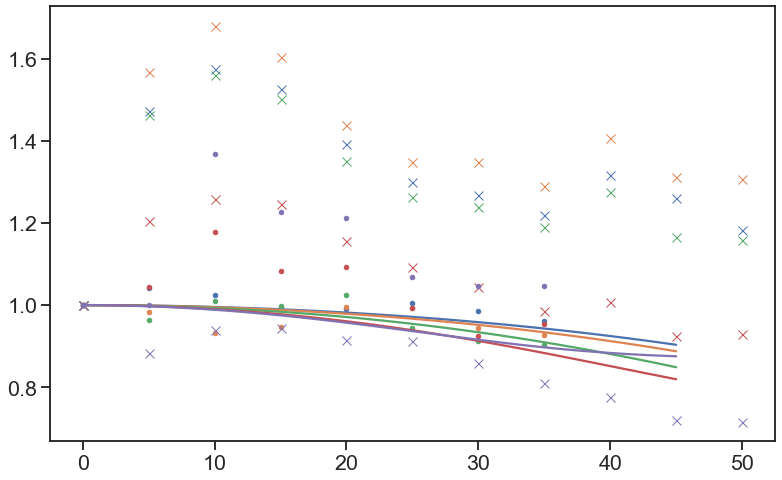

In [185]:
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

clist = sns.color_palette('deep', n_colors=10)
data_list = [penn_state_tot_power, jugaad_tot_power, cresana_tot_power]
x_list = [np.linspace(0, 35, 8), np.linspace(0, 50, 11), np.linspace(0, 45, 46)]

for i in range(5):
    for j, data_item in enumerate(data_list):
        if j == 0:
            ax.plot(x_list[j], np.flip(data_item[:, i] / data_item[-1, i]), marker='.', ls='None', color=clist[i])
        elif j == 1:
            ax.plot(x_list[j], np.flip(data_item[:, i] / data_item[-1, i]), marker='x', ls='None', color=clist[i])
        else:
            ax.plot(x_list[j], np.flip(data_item[:, i*5] / data_item[-1, i*5]), marker='None', ls='-', color=clist[i])

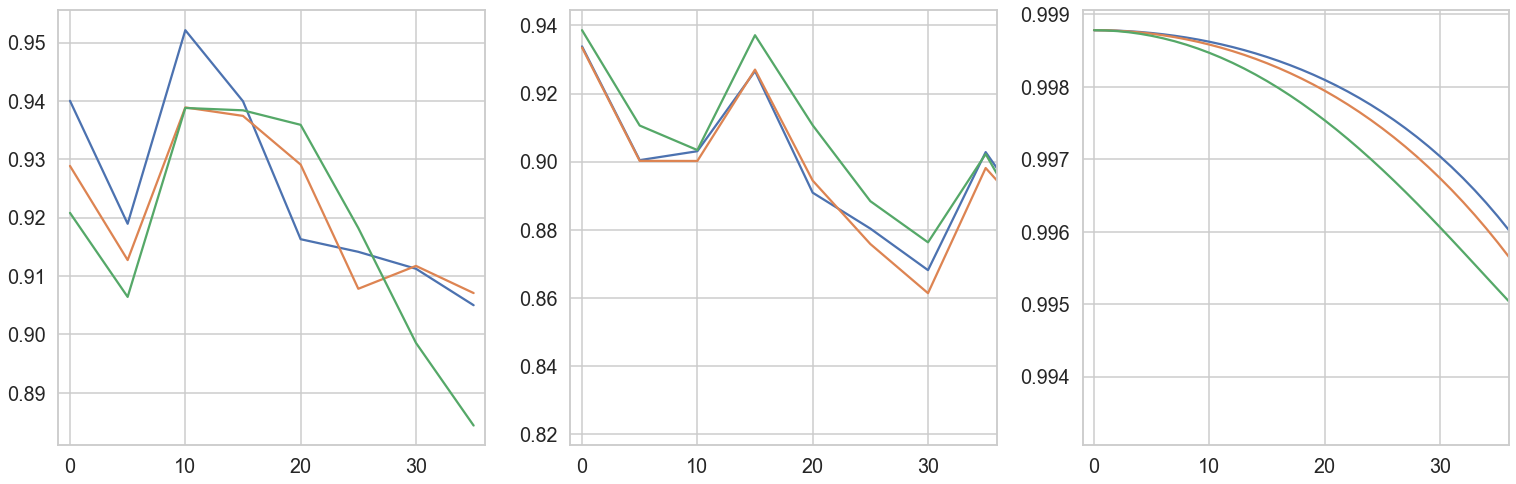

In [25]:
beam_data_list = [penn_state_beam_max, jugaad_beam_max, cresana_beam_max]
max_data_list = [penn_state_tot_power, jugaad_tot_power, cresana_tot_power]
extent_list = [(0, 50, 0, 35), (0, 50, 0, 50), (0, 30, 0, 45)]
axs = []
fig = plt.figure(figsize = (26, 8))
for i in range(len(beam_data_list)):
    axs.append(fig.add_subplot(1,len(data_list),i+1))
    if i < 2:
        n_lines = beam_data_list[i].shape[1]
        for j in range(3):
            n_pts = beam_data_list[i][:, j].size
            axs[i].plot(np.linspace(0, (n_pts-1)*5, n_pts), np.flip(beam_data_list[i][:,j]/max_data_list[i][:,j]))
    else:
        for j in [0, 5, 10, ]:
            n_pts = beam_data_list[i][:, j].size
            axs[i].plot(np.linspace(0,n_pts-1,n_pts), np.flip(beam_data_list[i][:, j]/max_data_list[i][:,j]))
            
    axs[i].set_xlim(-1,36 )


(-1.0, 36.0)

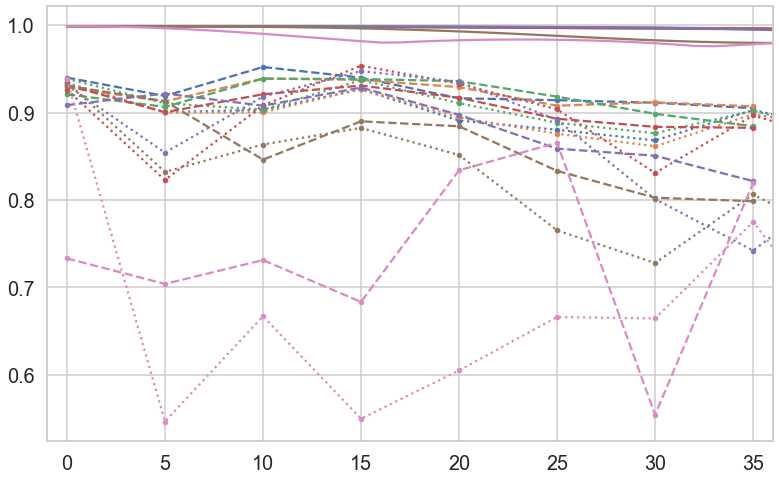

In [41]:
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

clist = sns.color_palette('deep', n_colors=10)
beam_data_list = [penn_state_beam_max, jugaad_beam_max, cresana_beam_max]
max_data_list = [penn_state_tot_power, jugaad_tot_power, cresana_tot_power]
x_list = [np.linspace(0, 35, 8), np.linspace(0, 50, 11), np.linspace(0, 45, 46)]

for i in range(7):
    for j in range(len(beam_data_list)):
        beam_data = beam_data_list[j]
        max_data = max_data_list[j]
        if j == 0:
            ax.plot(x_list[j], np.flip(beam_data[:, i] / max_data[:, i]), marker='.', ls='--', color=clist[i])
        elif j == 1:
            ax.plot(x_list[j], np.flip(beam_data[:, i] / max_data[:, i]), marker='.', ls=':', color=clist[i])
        else:
            ax.plot(x_list[j], np.flip(beam_data[:, i*5] / max_data[:, i*5]), marker='None', ls='-', color=clist[i])
        
#ax.set_ylim(0.80, 1.01)
ax.set_xlim(-1,36)